In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("Telco-Customer-Churn.csv")
df=pd.DataFrame(data)

In [3]:
#analyzing  and cleaning  data for model
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df["TotalCharges"]= df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'])


In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:

#converting all yes no values to 0 and 1  
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in service_cols:
    df[col] = df[col].replace({'No phone service': 'No', 'No internet service': 'No'})
    df[col] = df[col].map({'Yes': 1, 'No': 0})
# encoding categorical values after train test split
categorical_col=['gender','Contract','InternetService','PaymentMethod']



In [15]:
df.drop(["customerID"], axis=1, inplace=True ) 


In [16]:
#feature engineering
df['ChargesPerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)
df['HasMultipleServices'] = (df['OnlineSecurity'] == 'Yes').astype(int) + \
                             (df['DeviceProtection'] == 'Yes').astype(int) + \
                             (df['TechSupport'] == 'Yes').astype(int)



In [17]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargesPerMonth,HasMultipleServices
0,Female,0,1,0,1,0,0,DSL,0,1,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,14.925000,0
1,Male,0,0,0,34,1,0,DSL,1,0,...,0,0,One year,0,Mailed check,56.95,1889.50,0,53.985714,0
2,Male,0,0,0,2,1,0,DSL,1,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,36.050000,0
3,Male,0,0,0,45,0,0,DSL,1,0,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,40.016304,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,50.550000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,...,1,1,One year,1,Mailed check,84.80,1990.50,0,79.620000,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,...,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,100.861644,0
7040,Female,0,1,1,11,0,0,DSL,1,0,...,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,28.870833,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,...,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,61.320000,0


Text(0, 0.5, 'numbers of instances')

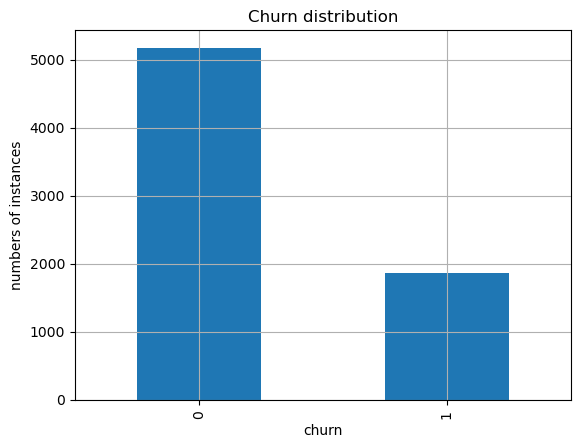

In [18]:
df["Churn"].value_counts().sort_index().plot.bar(grid="true")
plt.title("Churn distribution")
plt.xlabel("churn")
plt.ylabel("numbers of instances")


In [19]:
# test train split
x = df.drop('Churn', axis=1)
y = df['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


Text(0, 0.5, 'numbers of instances')

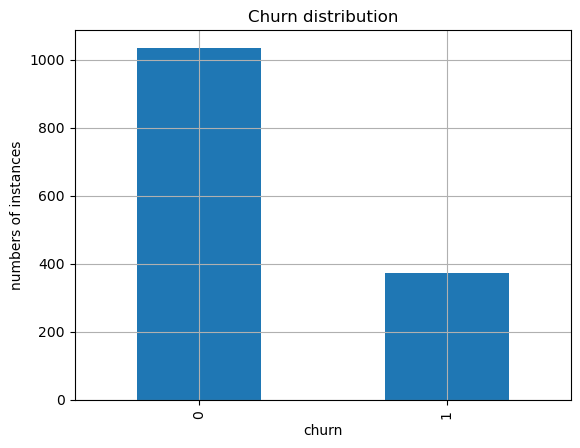

In [20]:
y_test.value_counts().sort_index().plot.bar(grid="true")
plt.title("Churn distribution")
plt.xlabel("churn")
plt.ylabel("numbers of instances")

In [21]:
# encoding  categorical columns
Encoder = OneHotEncoder(drop='first', sparse_output=False )
Encoder.fit(x_train[categorical_col])

x_train_encoded=Encoder.transform(x_train[categorical_col])
x_test_encoded=Encoder.transform(x_test[categorical_col])

encoded_col=Encoder.get_feature_names_out(categorical_col)
x_train_ohe=pd.DataFrame(x_train_encoded,columns=encoded_col, index=x_train.index)
x_test_ohe=pd.DataFrame(x_test_encoded,columns=encoded_col, index=x_test.index)


X_train = x_train.drop(categorical_col, axis=1)
X_test = x_test.drop(categorical_col, axis=1)

X_train = pd.concat([X_train, x_train_ohe], axis=1)
X_test = pd.concat([X_test, x_test_ohe], axis=1)



In [22]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,ChargesPerMonth,HasMultipleServices,gender_Male,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,0,0,0,35,0,0,0,0,1,0,...,47.268056,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3151,0,1,1,15,1,0,1,0,0,0,...,71.971875,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4860,0,1,1,13,0,0,1,1,0,1,...,42.167857,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3867,0,1,0,26,1,0,0,1,1,0,...,70.581481,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3810,0,1,1,1,1,0,0,0,0,0,...,22.275000,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0,1,0,71,1,1,0,1,1,1,...,107.051389,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6227,0,0,0,2,1,0,0,0,0,0,...,26.783333,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4673,1,0,0,25,1,1,1,1,0,0,...,102.315385,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2710,0,1,0,24,1,0,0,0,0,0,...,19.312000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [23]:
X_train.columns.tolist()



['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'ChargesPerMonth',
 'HasMultipleServices',
 'gender_Male',
 'Contract_One year',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'InternetService_No',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [24]:
# scaling the numerical columns
scaler= StandardScaler()
numeric_cols = ['tenure','TotalCharges','MonthlyCharges','ChargesPerMonth']
scaler.fit(X_train[numeric_cols])
X_train[numeric_cols]=scaler.transform(X_train[numeric_cols])
X_test[numeric_cols]=scaler.transform(X_test[numeric_cols])



In [25]:
X_train.columns.tolist()

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'ChargesPerMonth',
 'HasMultipleServices',
 'gender_Male',
 'Contract_One year',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'InternetService_No',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [26]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,ChargesPerMonth,HasMultipleServices,gender_Male,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,0,0,0,0.102371,0,0,0,0,1,0,...,-0.389837,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3151,0,1,1,-0.711743,1,0,1,0,0,0,...,0.416821,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4860,0,1,1,-0.793155,0,0,1,1,0,1,...,-0.556374,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3867,0,1,0,-0.263980,1,0,0,1,1,0,...,0.371421,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3810,0,1,1,-1.281624,1,0,0,0,0,0,...,-1.205939,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0,1,0,1.567778,1,1,0,1,1,1,...,1.562278,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6227,0,0,0,-1.240918,1,0,0,0,0,0,...,-1.058728,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4673,1,0,0,-0.304686,1,1,1,1,0,0,...,1.407633,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2710,0,1,0,-0.345392,1,0,0,0,0,0,...,-1.302690,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [27]:
X_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,ChargesPerMonth,HasMultipleServices,gender_Male,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
437,0,1,1,1.608483,1,1,1,1,1,1,...,1.854568,0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2280,1,0,0,-0.996684,1,1,0,0,0,1,...,1.363049,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2235,0,1,1,0.346606,1,1,1,1,1,0,...,0.563280,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4460,0,1,0,-0.589626,1,0,0,0,1,1,...,0.590887,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3761,0,1,0,1.608483,1,1,1,1,1,0,...,0.714459,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,0,1,1,0.672252,1,0,1,1,1,1,...,0.904272,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4439,0,1,1,-0.182569,1,0,0,0,0,0,...,-1.383870,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3857,0,0,0,-1.118801,1,0,0,0,0,0,...,-1.424171,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4758,0,0,0,0.957192,1,0,0,0,0,0,...,-1.330694,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [28]:
y_train.value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

In [29]:
assert X_train.shape[1] == X_test.shape[1], "Feature mismatch!"
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (5634, 25)
Test set: (1409, 25)


In [30]:
# now training model with data
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,root_mean_squared_error, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

model1 = LogisticRegression(max_iter=1000,class_weight='balanced')
model2 = RandomForestClassifier(n_estimators=300,
                                max_depth=10,
                                min_samples_split=5,
                                class_weight='balanced')
model3 = DecisionTreeClassifier()
model4 = XGBClassifier(eval_metric='logloss')


model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)


probs = model1.predict_proba(X_test)[:,1]
pred = (probs >= 0.45).astype(int)



pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

acc1 = accuracy_score(y_test, pred1)
acc2 = accuracy_score(y_test, pred2)
acc3 = accuracy_score(y_test, pred3)
acc4 = accuracy_score(y_test, pred4)
print(f"logi_acc{acc1},random_acc{acc2},dc_acc[{acc3},xgb_acc{acc4}")

precision1 = precision_score(y_test, pred1)
precision2= precision_score(y_test, pred2)
precision3= precision_score(y_test, pred3)
precision4= precision_score(y_test, pred4)
print(f"logi_precision{precision1},random_precision{precision2},dc_precision{precision3},xgb_precision{precision4}")

recall1 = recall_score(y_test, pred1)
recall2= recall_score(y_test, pred2)
recall3= recall_score(y_test, pred3)
recall4= recall_score(y_test, pred4)
print(f"logi_recall{recall1},random_recall{recall2},dc_recall{recall3},xgb_recall{recall4}")


f11 = f1_score(y_test, pred1)
f12= f1_score(y_test, pred2)
f13= f1_score(y_test, pred3)
f14= f1_score(y_test, pred4)
print(f"logi_f1{f11},random_f1{f12},dc_f1{f13},xgb_f1{f14}")

roc1= roc_auc_score(y_test, model1.predict_proba(X_test)[:,1])
roc2= roc_auc_score(y_test, model2.predict_proba(X_test)[:,1])
roc3= roc_auc_score(y_test, model3.predict_proba(X_test)[:,1])
roc4= roc_auc_score(y_test, model4.predict_proba(X_test)[:,1])
print("model1_roc",roc1)
print("model2_roc",roc2)
print("model3_roc",roc3)
print("model4_roc",roc4)



# model = LogisticRegression(max_iter=1000, class_weight='balanced')
# model.fit(X_train, y_train)
# 

# # Optional threshold tuning


# print("Accuracy:", accuracy_score(y_test, pred))
# print("Precision:", precision_score(y_test, pred))
# print("Recall:", recall_score(y_test, pred))
# print("F1:", f1_score(y_test, pred))
# print("AUC:", roc_auc_score(y_test, probs))

logi_acc0.7430801987224982,random_acc0.7714691270404542,dc_acc[0.7246273953158269,xgb_acc0.7778566359119943
logi_precision0.5104166666666666,random_precision0.5524193548387096,dc_precision0.4807692307692308,xgb_precision0.5950155763239875
logi_recall0.786096256684492,random_recall0.732620320855615,dc_recall0.4679144385026738,xgb_recall0.5106951871657754
logi_f10.6189473684210526,random_f10.6298850574712643,dc_f10.4742547425474255,xgb_f10.5496402877697841
model1_roc 0.8471234079929731
model2_roc 0.8432896742359657
model3_roc 0.6445813635071946
model4_roc 0.8173202614379085


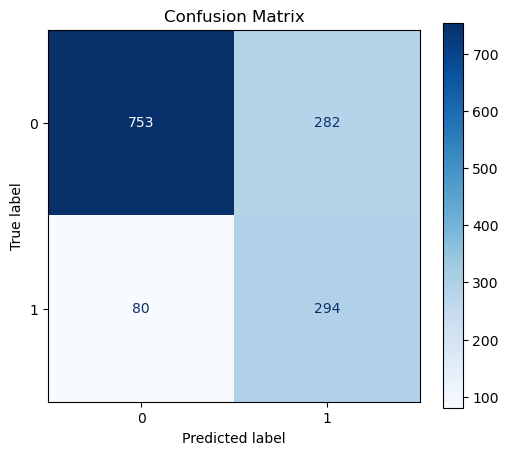

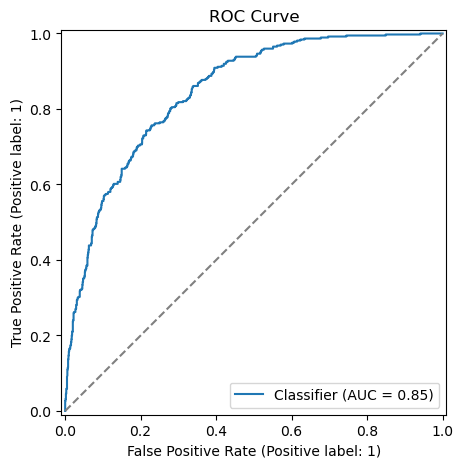

In [31]:

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# --- Confusion Matrix ---
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred1, ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# --- ROC Curve ---
fig, ax = plt.subplots(figsize=(6, 5))
RocCurveDisplay.from_predictions(y_test, probs, ax=ax)
plt.title("ROC Curve")
plt.plot([0,1],[0,1],'--',color='grey')
plt.show()


In [32]:
import joblib
#training model
joblib.dump(model1,"model.pkl")
#scaler model
joblib.dump(scaler,"scaler.pkl")
#encoder model
joblib.dump(Encoder,"encoder.pkl")


['encoder.pkl']

In [33]:
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_test, "y_test.pkl")


['y_test.pkl']

In [36]:
model1.feature_names_in_


array(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'ChargesPerMonth', 'HasMultipleServices',
       'gender_Male', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)